# Monthly Data
- Australian anti-diabetic monthly sales data will be used
https://raw.githubusercontent.com/selva86/datasets/master/a10.csv
- Used for performance data such as monthly sales, subscribers, etc. in all companies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose

- Import data. plottig.

- Separation of seasonal factors. Create a table containing Trend, Seasonl, and Residual.
- Insight Derivation
  1. Average monthly growth rate
  2. Seasonal Factor Analysis
  3. Whether residual increases or decreases

--------

In [2]:
# convert date type to date 
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


<AxesSubplot:xlabel='date'>

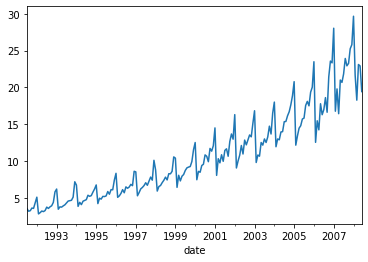

In [3]:
df.value.plot()

In [4]:
df=df.loc[df.index>'1999-12-31']

In [5]:
# Set tow_sided to false since recent data is more important
result= seasonal_decompose(df, model='additive', two_sided=False)

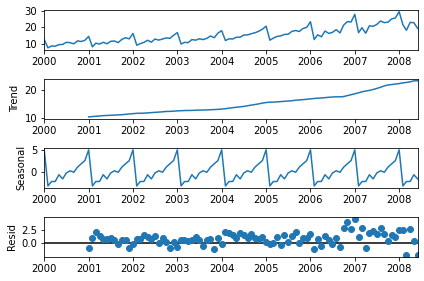

In [6]:
result.plot()
plt.show()

In [7]:
df_re=pd.concat([result.observed, result.trend, result.seasonal, result.resid], axis=1)

In [8]:
df_re.head()

,0,trend,seasonal,resid
date,,,,
2000-01-01,12.511462,NaN,5.061367,NaN
2000-02-01,7.457199,NaN,-3.307973,NaN
2000-03-01,8.591191,NaN,-2.293969,NaN
2000-04-01,8.474000,NaN,-2.264396,NaN
2000-05-01,9.386803,NaN,-0.711368,NaN


In [9]:
df_re.columns=['obs', 'trend', 'seasonal', 'resid']
df_re.dropna(inplace=True)

In [10]:
df_re.head()

,obs,trend,seasonal,resid
date,,,,
2001-01-01,14.497581,10.290804,5.061367,-0.854590
2001-02-01,8.049275,10.398229,-3.307973,0.959019
2001-03-01,10.312891,10.494636,-2.293969,2.112225
2001-04-01,9.753358,10.619680,-2.264396,1.398075
2001-05-01,10.850382,10.733969,-0.711368,0.827781


In [11]:
df_re.head(24)
df_re['year']=df_re.index.year

In [12]:
df_re.head()

,obs,trend,seasonal,resid,year
date,,,,,
2001-01-01,14.497581,10.290804,5.061367,-0.854590,2001
2001-02-01,8.049275,10.398229,-3.307973,0.959019,2001
2001-03-01,10.312891,10.494636,-2.293969,2.112225,2001
2001-04-01,9.753358,10.619680,-2.264396,1.398075,2001
2001-05-01,10.850382,10.733969,-0.711368,0.827781,2001


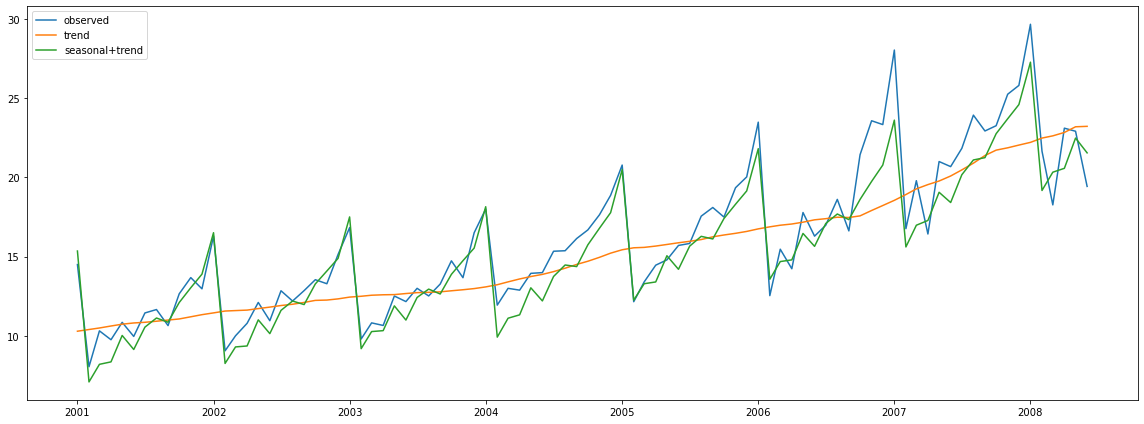

In [13]:
plt.figure(figsize=(16,6))
plt.plot(df_re.obs)
plt.plot(df_re.trend)
plt.plot(df_re.seasonal+df_re.trend)
plt.legend(['observed', 'trend', 'seasonal+trend'])
plt.tight_layout()
plt.show()
# In 2006 and 2007, there is a tendency to deviate from the ordinary cycle. (residual is large.)

<AxesSubplot:xlabel='date'>

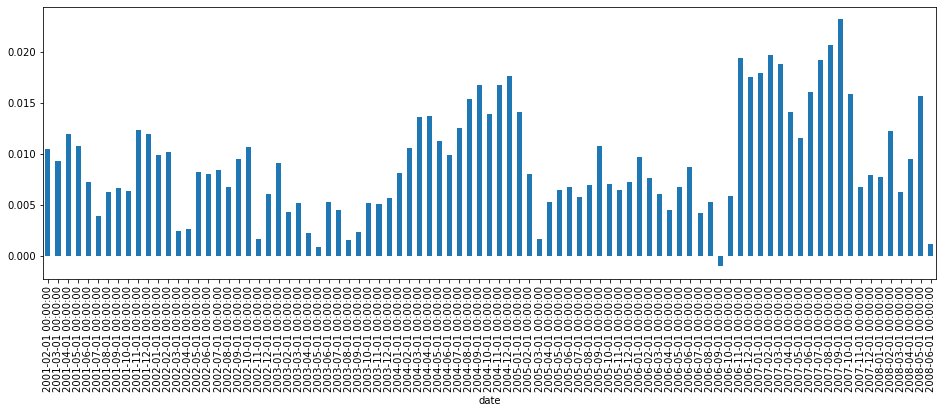

In [14]:
# how to see percentage of trend
df_re['trend'].pct_change().dropna().plot(kind = 'bar', figsize = (16, 5))